<a href="https://colab.research.google.com/github/alesyacurtis/MachineLearning2024/blob/main/ML_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Графика для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# ***Прогнозирование количества самоубийств***


##*1. Описание задачи*


Датасет `master2.csv` позволяет исследователям и аналитикам изучать тенденции в самоубийствах по различным странам и регионам, а также выявлять возможные факторы, влияющие на уровень самоубийств, такие как экономическое положение, возраст и пол. Анализ данных может помочь разработать меры по предотвращению самоубийств и улучшению психического здоровья населения.

Датасет является ценным инструментом для проведения исследований в области общественного здравоохранения, психологии, социологии и экономики.

Данный датасет содержит следующие признаки:
- `country` - название страны
- `year` - год, за который предоставлены данные
- `sex` - пол (мужской/женский)
- `age` - возрастная группа
- `suicides_no` - количество самоубийств
- `population` - численность населения
- `suicides/100k pop` - количество самоубийств на 100 тыс. человек
- `country-year` - комбинированное значение страны и года
- `HDI for year` - индекс человеческого развития для года
- `gdp_for_year ($)`  - ВВП страны за год
- `gdp_per_capita ($)`  - ВВП на душу населения
- `generation` - поколение, к которому относится человек, совершивший самоубийство


##*2. Чтение данных*

Загрузка данных из интернета:


In [35]:
url = "https://raw.githubusercontent.com/alesyacurtis/MachineLearning2024/refs/heads/main/master2.csv"
data_raw = pd.read_csv(url)
data_raw.shape

(27820, 12)

В текущем наборе данных содержится информация о 27820 наблюдениях, разделённая на  12 признаков.
Ознакомимся с информацией, хранящейся в нем:

In [36]:
data_raw

country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male  05-14 years           60     2762158   
27818  Uzbekistan  2014  female  05-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)  \
0                   6.71     Albania1987           NaN        2156624900   
1                   5.19     Albania1987           NaN        2156624900   
2                   4.83     Albania1987           NaN        2156624900   
3                   4.59     Albania1987           NaN        2156624900   
4                   3.28     Albania1987           NaN        2156624900   
...                  ...             ...           ...               ...   
27815               2.96  Uzbekistan2014         0.675       63067077179   
27816               2.58  Uzbekistan2014         0.675       63067077179   
27817               2.17  Uzbekistan2014         0.675       63067077179   
27818               1.67  Uzbekistan2014         0.675       63067077179   
27819               1.46  Uzbekistan2014         0.675       63067077179   

       gdp_per_capita ($)         generation  
0                     796     4.Generation X  
1                     796           2.Silent  
2                     796     4.Generation X  
3                     796  1.G.I. Generation  
4                     796          3.Boomers  
...                   ...                ...  
27815                2309     4.Generation X  
27816                2309           2.Silent  
27817                2309     6.Generation Z  
27818                2309     6.Generation Z  
27819                2309          3.Boomers  

[27820 rows x 12 columns]

In [37]:
data_raw.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

Подробная информация о столбцах набора данных:

In [38]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9   gdp_for_year ($)    27820 non-null  int64  
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [39]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9   gdp_for_year ($)    27820 non-null  int64  
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


По полученному описанию можно определить наличие пропущенных значений, а так же провести типизацию признаков:
* `sex`, `age` - являются категориальными, номинальными признаками.
* `country` - текстовой признак
* Остальные будут являться количественными (числовыми) признаками.

Однако все категориальные признаки являются по типу `'object'`, исправим это, заменив тип на специальный, предназначенный для хранения категориальных значений: `'category'`

In [40]:
data_raw['sex'] = data_raw['sex'].astype('category')
data_raw['age'] = data_raw['age'].astype('category')
data_raw['generation'] = data_raw['generation'].astype('category')
data_raw['country'] = data_raw['country'].astype('category')

In [41]:
data_raw['sex'].dtype

CategoricalDtype(categories=['female', 'male'], ordered=False, categories_dtype=object)

In [42]:
data_raw['age'].dtype

CategoricalDtype(categories=['05-14 years', '15-24 years', '25-34 years', '35-54 years',
                  '55-74 years', '75+ years'],
, ordered=False, categories_dtype=object)

In [43]:
data_raw['generation'].dtype

CategoricalDtype(categories=['1.G.I. Generation', '2.Silent', '3.Boomers',
                  '4.Generation X', '5.Millenials', '6.Generation Z'],
, ordered=False, categories_dtype=object)

In [44]:
data_raw['country'].dtype

CategoricalDtype(categories=['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia',
                  'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
                  'Bahrain',
                  ...
                  'Thailand', 'Trinidad and Tobago', 'Turkey', 'Turkmenistan',
                  'Ukraine', 'United Arab Emirates', 'United Kingdom',
                  'United States', 'Uruguay', 'Uzbekistan'],
, ordered=False, categories_dtype=object)

##*3. Визуализация данных, вычисление основных характеристик*


Выведем описательную статистику по нашему датасету: математическое описание для каждого признака. Сначала рассмотрим категориальные признаки:

In [45]:
data_raw.describe(include=['category'])

country     sex          age      generation
count       27820   27820        27820           27820
unique        101       2            6               6
top     Mauritius  female  15-24 years  4.Generation X
freq          382   13910         4642            6408

* count - количество значений для каждого признака (значения признака Gender отличаются от всех остальных, так как в нем есть пропущенные значения)
* unique - количество уникальных значений
* top - значения, встречающиеся чаще всего
* freq - частота значений top

Теперь посмотрим на данные о количественных признаках:

In [46]:
data_raw.describe()

year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_for_year ($)  gdp_per_capita ($)  
count   8364.000000      2.782000e+04        27820.000000  
mean       0.776601      4.455810e+11        16866.464414  
std        0.093367      1.453610e+12        18887.576472  
min        0.483000      4.691962e+07          251.000000  
25%        0.713000      8.985353e+09         3447.000000  
50%        0.779000      4.811469e+10         9372.000000  
75%        0.855000      2.602024e+11        24874.000000  
max        0.944000      1.812071e+13       126352.000000

* count — количество значений для каждого признака
* mean — среднее значение
* std — стандартное отклонение, которое показывает, на сколько в среднем отклоняются варианты от среднего значения
* min — минимальное значение
* 25% — значения, которые объект не превышает с вероятностью 25%
* 50% — медиана, то есть значения, которые объект не превышает с вероятностью 50%
* 75% — значения, которые объект не превышает с вероятностью 75%
* max — максимальное значение

Внимательно изучив таблицу можно решить, в каких признaках желательно обработать выбросы.
Считаем необходимым рассмотреть такие признаки, как:
population,	gdp_for_year,	gdp_per_capita, так как их средние и медианные значения ушли далеко от половины максимального значения.

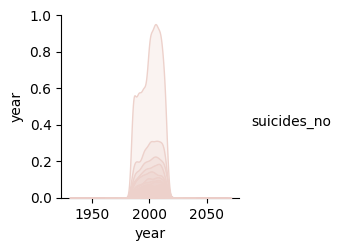

In [47]:
sns.pairplot(data_raw[["year","suicides_no"]], hue="suicides_no")

<Axes: ylabel='year'>

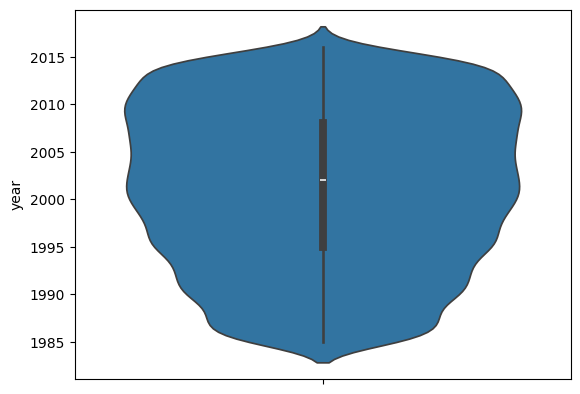

In [48]:
sns.violinplot(y="year", data=data_raw)


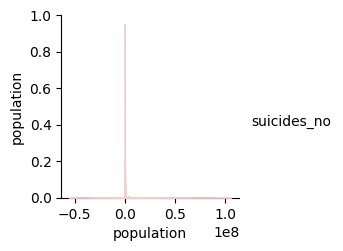

In [49]:
sns.pairplot(data_raw[["population","suicides_no"]], hue="suicides_no")


<Axes: ylabel='population'>

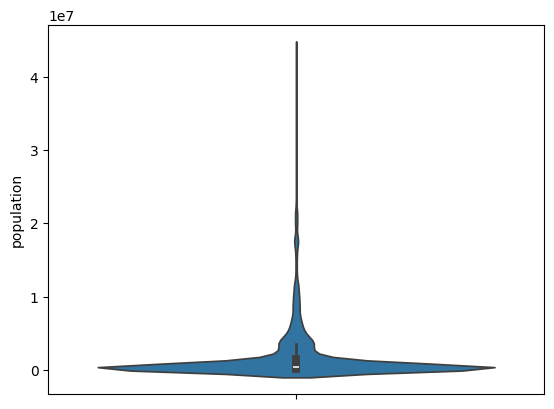

In [50]:
sns.violinplot(y="population", data=data_raw)

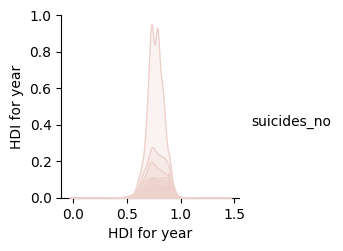

In [51]:
sns.pairplot(data_raw[["HDI for year","suicides_no"]], hue="suicides_no")

<Axes: ylabel='HDI for year'>

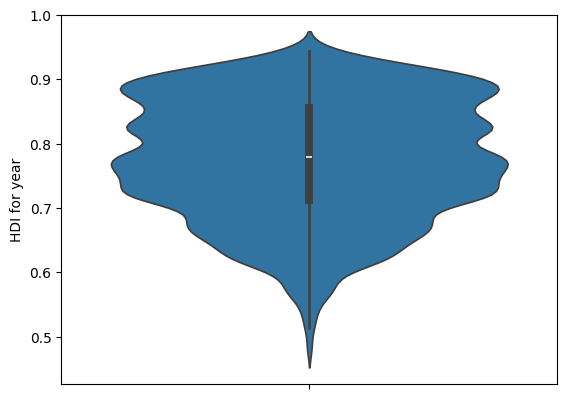

In [52]:
sns.violinplot(y="HDI for year", data=data_raw)

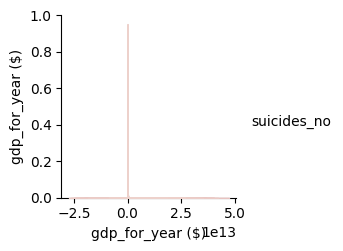

In [53]:
sns.pairplot(data_raw[["gdp_for_year ($)","suicides_no"]], hue="suicides_no")

<Axes: ylabel='gdp_for_year ($)'>

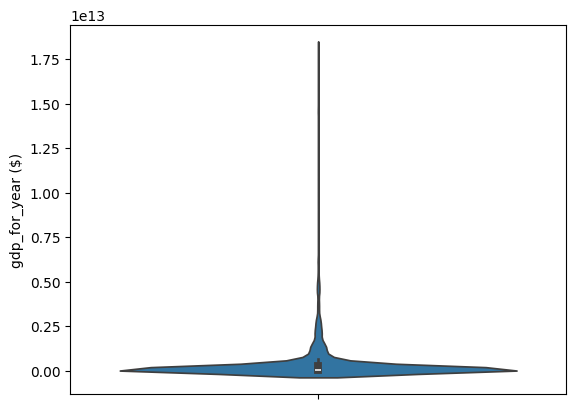

In [54]:
sns.violinplot(y="gdp_for_year ($)", data=data_raw)

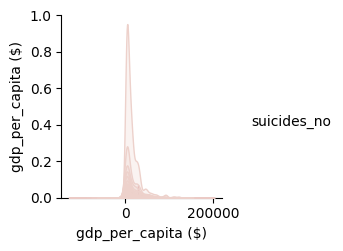

In [55]:
sns.pairplot(data_raw[["gdp_per_capita ($)","suicides_no"]], hue="suicides_no")

<Axes: ylabel='gdp_per_capita ($)'>

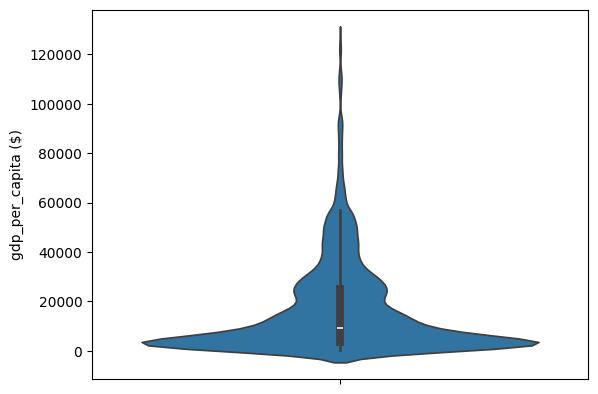

In [56]:
sns.violinplot(y="gdp_per_capita ($)", data=data_raw)

<Axes: ylabel='population'>

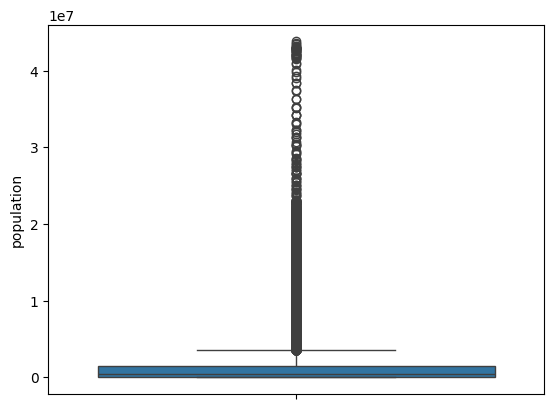

In [57]:
sns.boxplot(y="population", data=data_raw)

<Axes: ylabel='gdp_for_year ($)'>

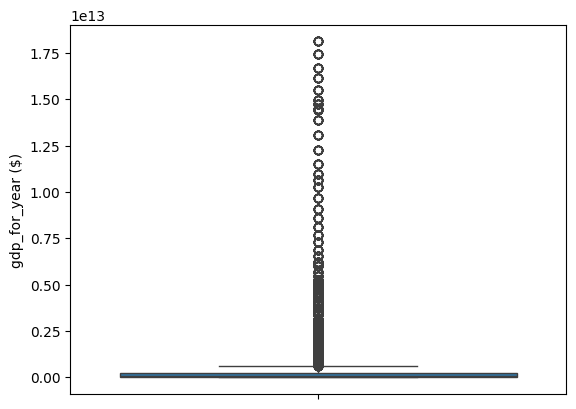

In [59]:
sns.boxplot(y="gdp_for_year ($)", data=data_raw)

<Axes: ylabel='gdp_per_capita ($)'>

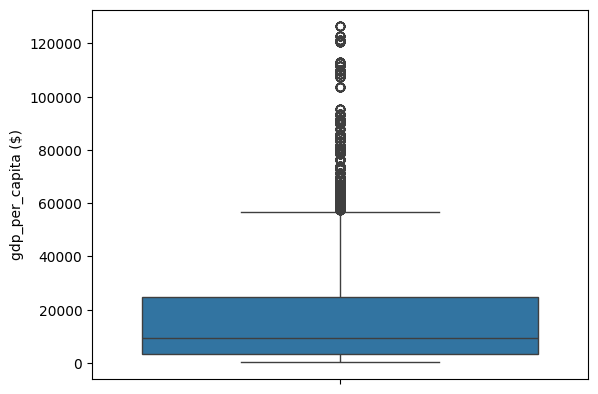

In [60]:
sns.boxplot(y="gdp_per_capita ($)", data=data_raw)

In [61]:
data_raw['suicides_no'].quantile(0.9995)

14183.262000003728

In [62]:
rows_to_drop = data_raw[data_raw['suicides_no'] > data_raw['suicides_no'].quantile(0.95)].index
len(rows_to_drop)
data_raw = data_raw.drop(rows_to_drop)
rows_to_drop = data_raw[data_raw['population'] > data_raw['population'].quantile(0.95)].index
len(rows_to_drop)
data_raw = data_raw.drop(rows_to_drop)
rows_to_drop = data_raw[data_raw['suicides/100k pop'] > data_raw['suicides/100k pop'].quantile(0.995)].index
len(rows_to_drop)
data_raw = data_raw.drop(rows_to_drop)
rows_to_drop = data_raw[data_raw['gdp_for_year ($)'] > data_raw['gdp_for_year ($)'].quantile(0.95)].index
len(rows_to_drop)
data_raw = data_raw.drop(rows_to_drop)
rows_to_drop = data_raw[data_raw['gdp_per_capita ($)'] > data_raw['gdp_per_capita ($)'].quantile(0.9995)].index
len(rows_to_drop)
data_raw = data_raw.drop(rows_to_drop)

<Axes: ylabel='suicides_no'>

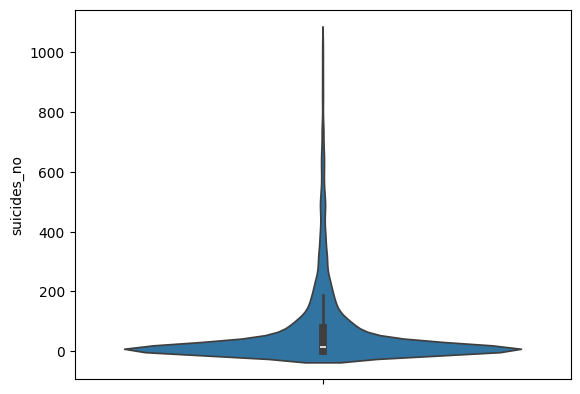

In [63]:
sns.violinplot(y="suicides_no", data=data_raw)

<Axes: ylabel='population'>

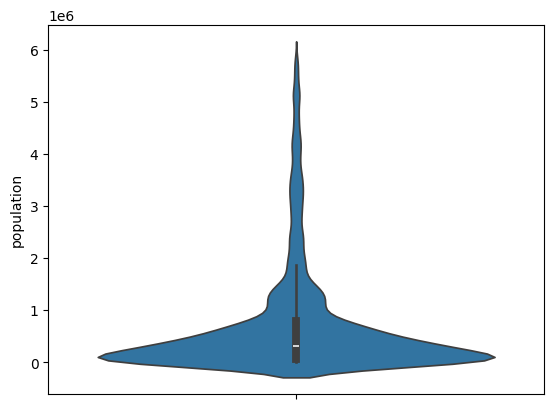

In [64]:
sns.violinplot(y="population", data=data_raw)

<Axes: ylabel='suicides/100k pop'>

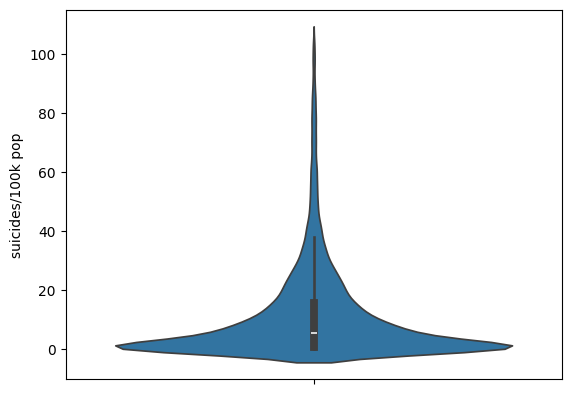

In [65]:
sns.violinplot(y="suicides/100k pop", data=data_raw)

<Axes: ylabel='gdp_for_year ($)'>

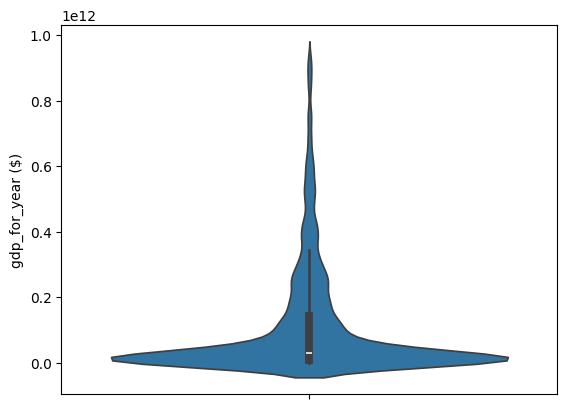

In [66]:
sns.violinplot(y="gdp_for_year ($)", data=data_raw)

<Axes: ylabel='gdp_per_capita ($)'>

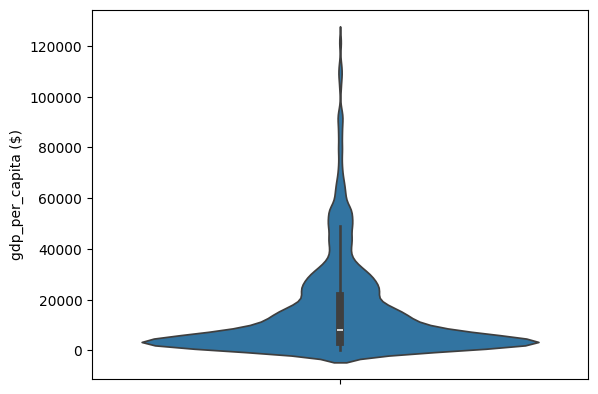

In [67]:
sns.violinplot(y="gdp_per_capita ($)", data=data_raw)

Посмотрим, сколько раз номинальные переменные принимают то или иное значение:

In [69]:
data_raw['age'].value_counts()

age
75+ years      4034
55-74 years    4009
15-24 years    3993
25-34 years    3985
05-14 years    3968
35-54 years    3735
Name: count, dtype: int64

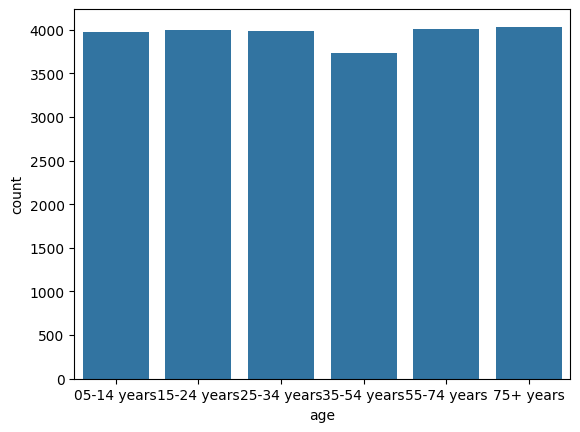

In [70]:
sns.countplot(x='age', data=data_raw)
pass

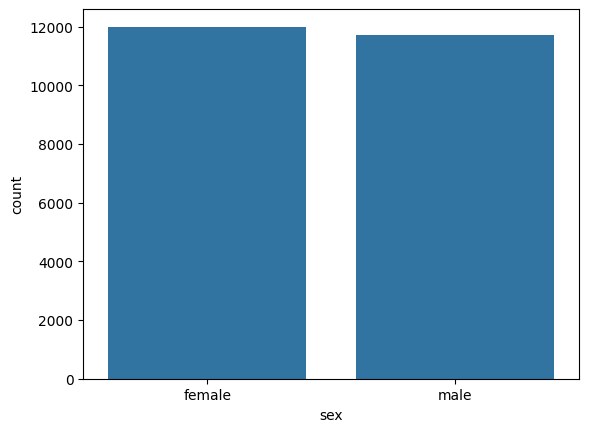

In [71]:
sns.countplot(x='sex', data=data_raw)
pass

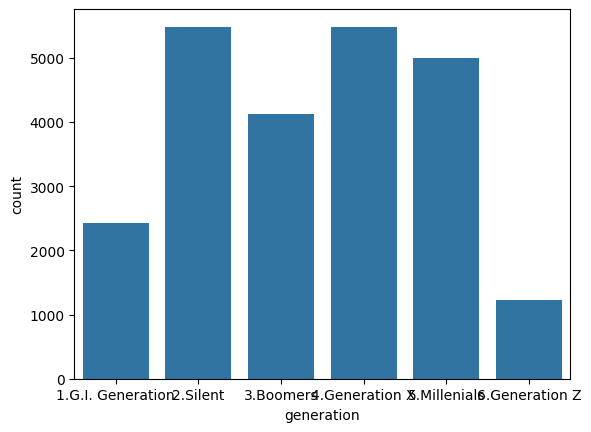

In [72]:
sns.countplot(x='generation', data=data_raw)
pass

На графиках видно, что данные не сбалансированные.
Взглянем на соотношение классов более подробно:

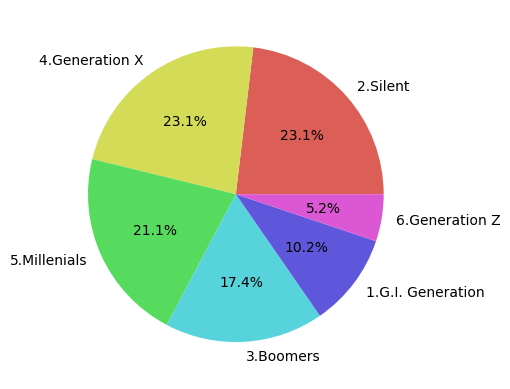

In [73]:
plt.pie(data_raw['generation'].value_counts(), labels = ['2.Silent','4.Generation X' ,'5.Millenials' ,
                  '3.Boomers', '1.G.I. Generation', '6.Generation Z'], colors = sns.color_palette("hls",6), autopct = '%1.1f%%')
pass

Построим диаграммы рассеивания для признаков:

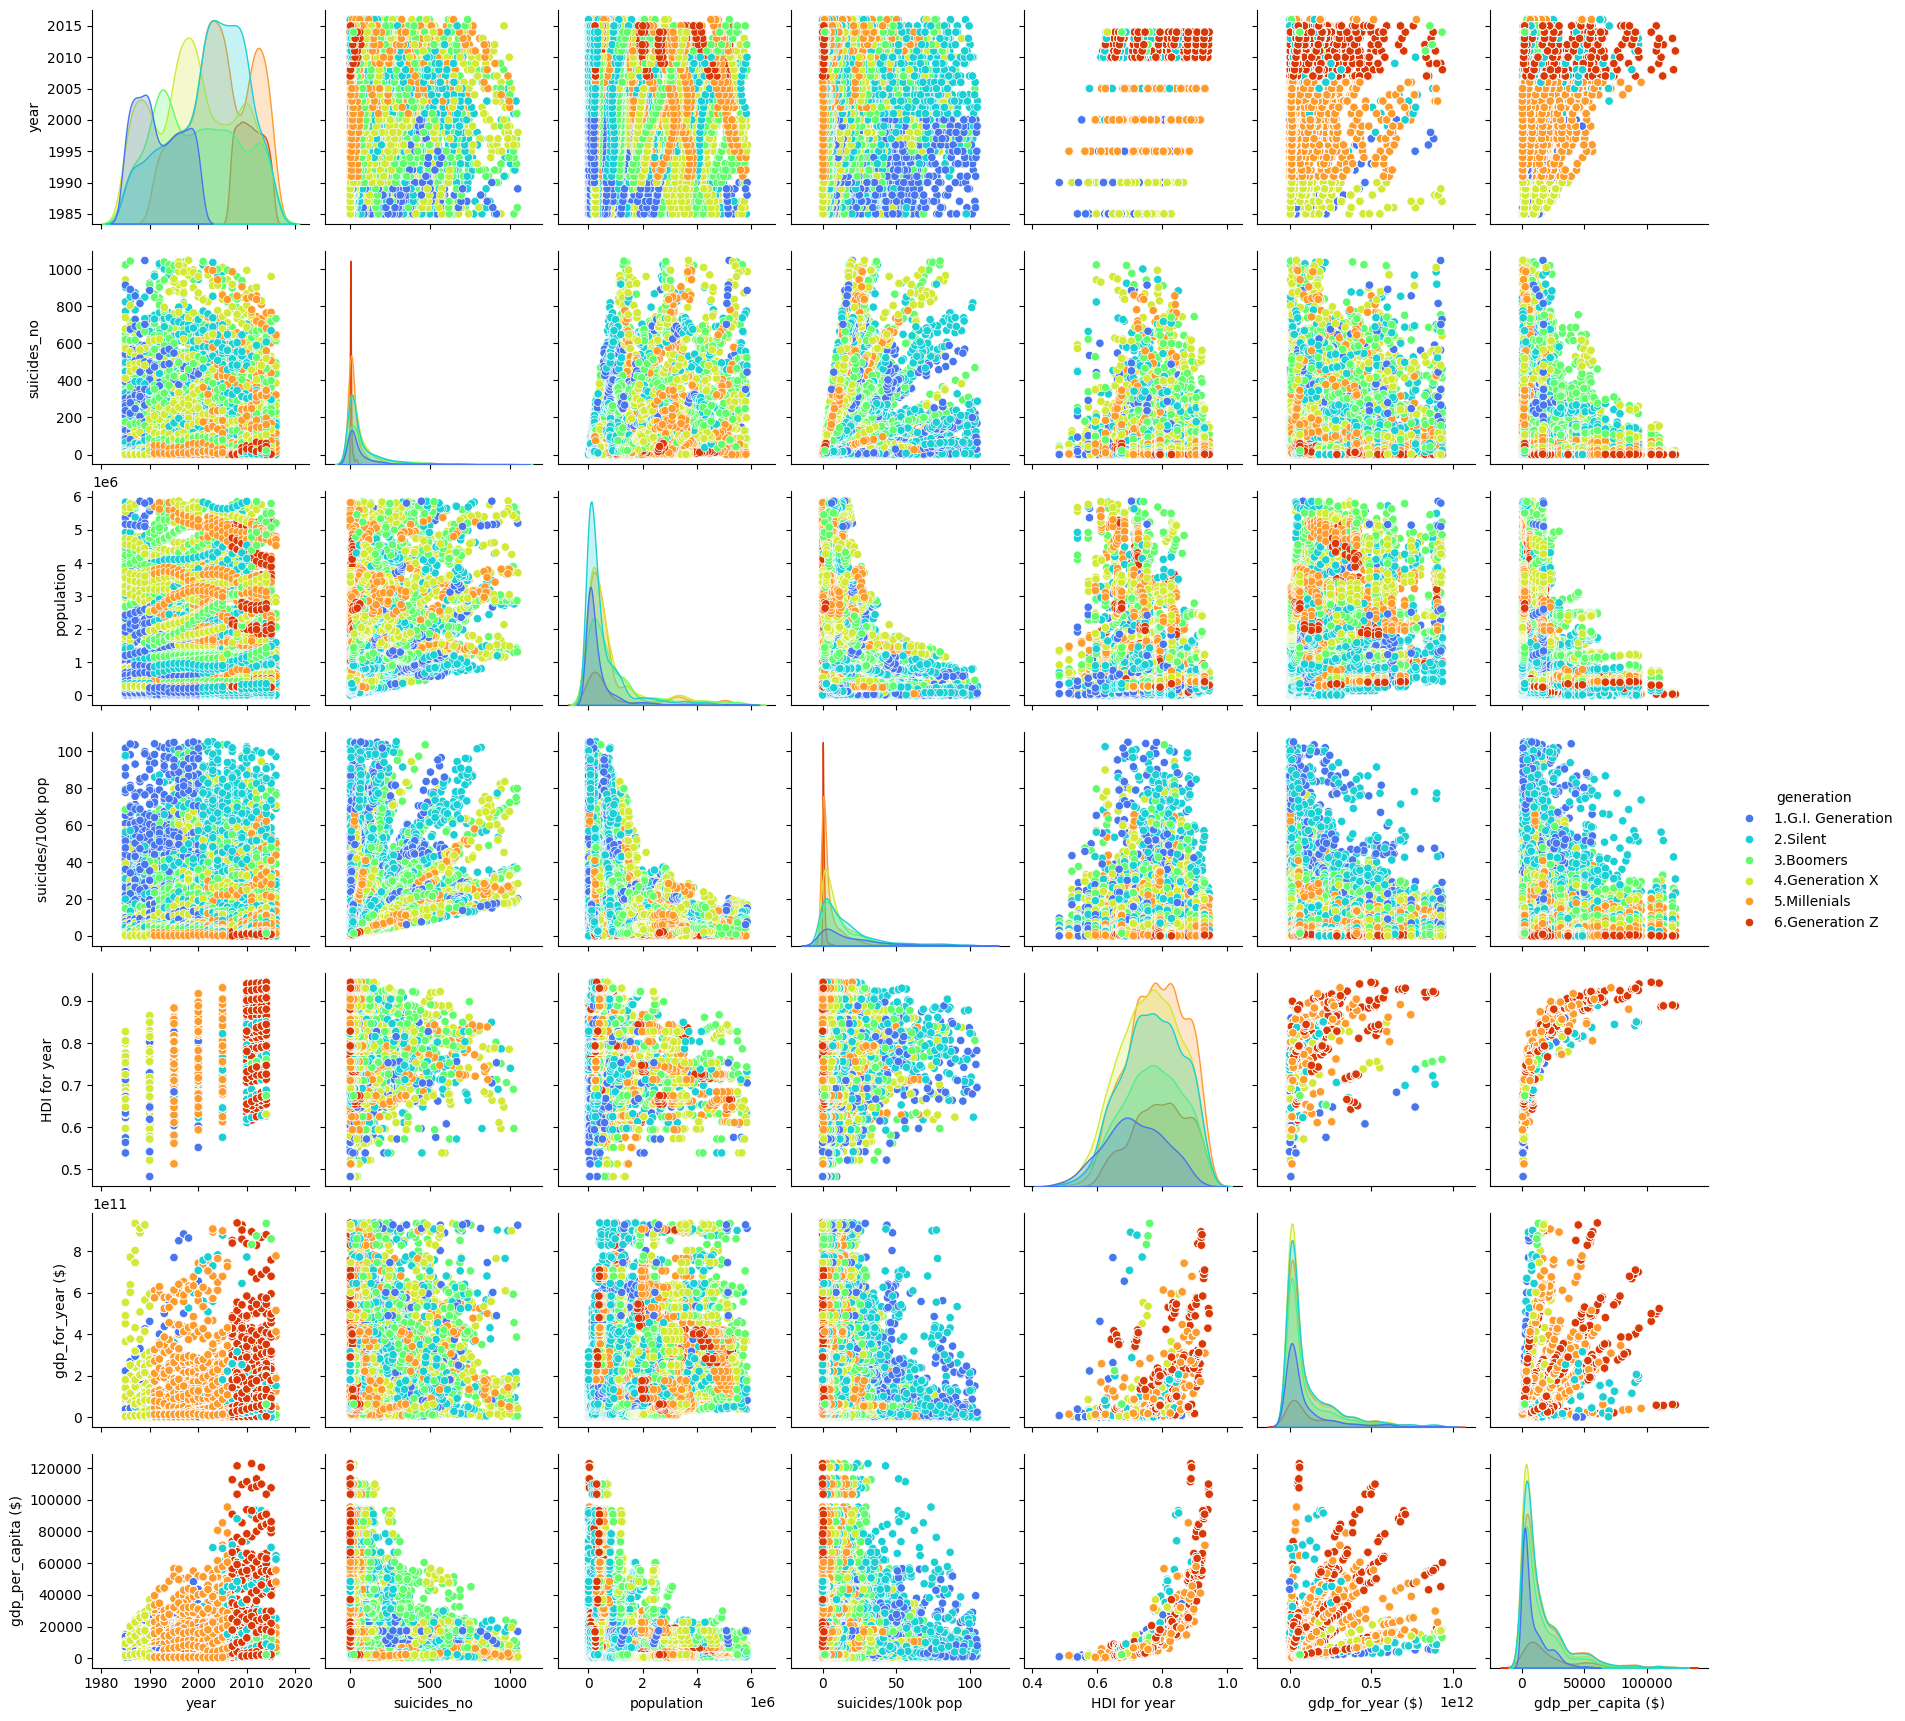

In [74]:
sns.pairplot(data_raw, hue="generation", palette="turbo")
pass

Выведем матрицу корреляции наших численных признаков:

In [75]:
corr_mat = data_raw.corr(numeric_only=True)
corr_mat

year  suicides_no  population  suicides/100k pop  \
year                1.000000    -0.045183   -0.044217          -0.023680   
suicides_no        -0.045183     1.000000    0.534922           0.443276   
population         -0.044217     0.534922    1.000000          -0.064829   
suicides/100k pop  -0.023680     0.443276   -0.064829           1.000000   
HDI for year        0.358411     0.047575   -0.121657           0.093104   
gdp_for_year ($)    0.152286     0.331544    0.470768           0.027241   
gdp_per_capita ($)  0.324149    -0.040741   -0.125065           0.022207   

                    HDI for year  gdp_for_year ($)  gdp_per_capita ($)  
year                    0.358411          0.152286            0.324149  
suicides_no             0.047575          0.331544           -0.040741  
population             -0.121657          0.470768           -0.125065  
suicides/100k pop       0.093104          0.027241            0.022207  
HDI for year            1.000000          0.512622            0.747129  
gdp_for_year ($)        0.512622          1.000000            0.458167  
gdp_per_capita ($)      0.747129          0.458167            1.000000

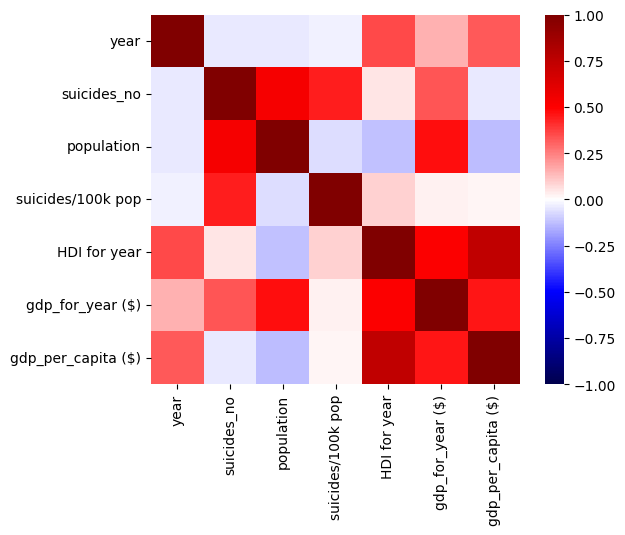

In [76]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='seismic')
pass

Отсюда, получим список признаков, в которых наблюдается корелляция:

In [77]:
import numpy as np
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack()

suicides_no   population            0.534922
HDI for year  gdp_for_year ($)      0.512622
              gdp_per_capita ($)    0.747129
dtype: float64

Исходя из этих данных, заметна высокая, очевидная корреляция:
* между suicides_no, population -  количество самоубийств и количества населения
* между population, gdp_for_year - количества населения и ВВП в год
* между HDI for year, gdp_per_capita - индекс человеческого развития в год и ВВП на душу населения


In [78]:
import numpy as np
corr_mat.where(np.triu(corr_mat < -0.5, k=1)).stack()

Series([], dtype: float64)

Большой обратной корреляции не имеется.

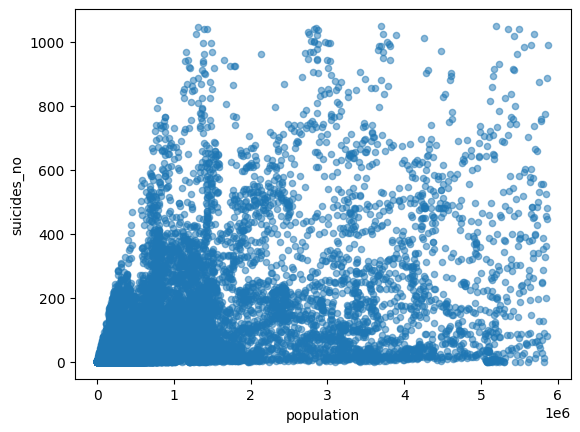

In [79]:
data_raw.plot(kind = 'scatter', x = 'population', y = 'suicides_no', alpha=.5)
pass

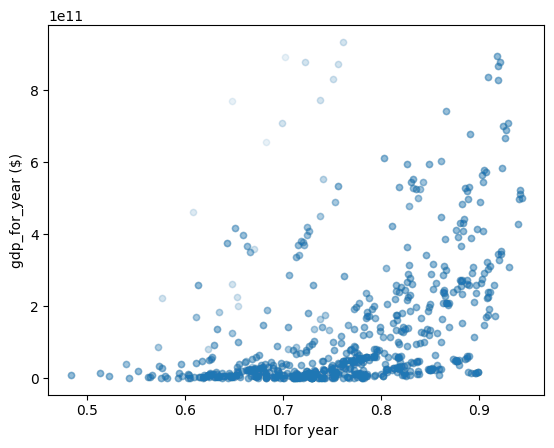

In [80]:
data_raw.plot(kind = 'scatter', x = 'HDI for year', y = 'gdp_for_year ($)', alpha=.05)
pass

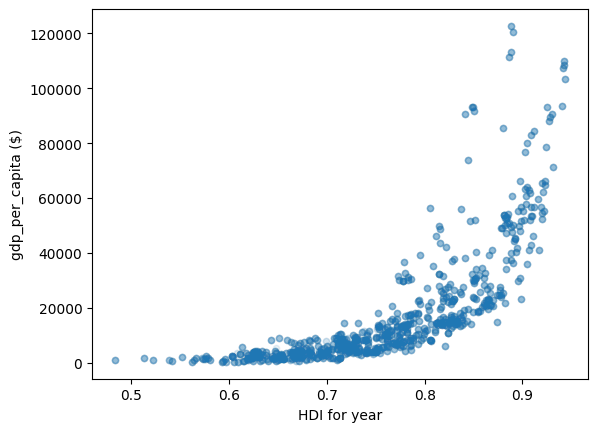

In [81]:
data_raw.plot(kind = 'scatter', x = 'HDI for year', y = 'gdp_per_capita ($)', alpha=.05)
pass

In [84]:
data_raw.describe()

year   suicides_no    population  suicides/100k pop  \
count  23724.000000  23724.000000  2.372400e+04       23724.000000   
mean    2001.080889     72.607107  7.249372e+05          11.586421   
std        8.467930    138.930395  1.073109e+06          16.368865   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1994.000000      2.000000  6.708000e+04           0.710000   
50%     2001.000000     15.000000  3.226000e+05           5.470000   
75%     2008.000000     77.000000  7.882860e+05          15.650000   
max     2016.000000   1049.000000  5.872928e+06         105.080000   

       HDI for year  gdp_for_year ($)  gdp_per_capita ($)  
count   7073.000000      2.372400e+04        23724.000000  
mean       0.767722      1.099387e+11        15529.997429  
std        0.091672      1.696518e+11        18719.015437  
min        0.483000      4.691962e+07          251.000000  
25%        0.705000      6.405211e+09         3252.000000  
50%        0.772000      2.976317e+10         8155.000000  
75%        0.837000      1.413524e+11        21545.000000  
max        0.944000      9.362282e+11       122729.000000

Вероятность самоубийства больше, если население больше и
ВВП в год больше.


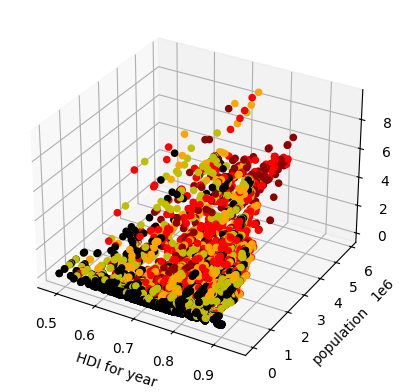

In [85]:
# Создание трехмерного графика
#population gdp_for_year ($)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('HDI for year')
ax.set_ylabel('population')
ax.set_zlabel('gdp_for_year ($)')
#c = ['r' if val > 70.0  else 'g' for val in data_raw['suicides/100k pop']]
c = ['black' if val < 15.0 else 'y' if  val < 50.0 else 'orange' if val < 100.0 else 'r' if   val < 300.0 else 'darkred' for val in data_raw['suicides_no']]
ax.scatter(data_raw['HDI for year'], data_raw['population'], data_raw['gdp_for_year ($)'], c=c, alpha=1)

# Отображение графика
plt.show()

Получившийся график подтверждает наши утверждения: большое количество населения и большое ВВП в год.

## 4. Обработка пропущенных значений

Проверим датасет на наличие пропущенных значений:

In [86]:
data_raw.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          16651
gdp_for_year ($)          0
gdp_per_capita ($)        0
generation                0
dtype: int64

Можно увидеть столбцы с пропущенными значениями. Их достаточно много, поэтому воспользоваться удалением - не вариант.

Поступим иначе. Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [116]:
data_raw.fillna(data_raw.median(axis = 0) ,axis = 0, inplace=True)

Проверим изменения:

In [119]:
data_raw.isna().sum()

country                         0
year                            0
suicides_no                     0
population                      0
suicides/100k pop               0
country-year                    0
HDI for year                    0
gdp_for_year ($)                0
gdp_per_capita ($)              0
age_05-14 years                 0
age_15-24 years                 0
age_25-34 years                 0
age_35-54 years                 0
age_55-74 years                 0
age_75+ years                   0
sex_male                        0
generation_1.G.I. Generation    0
generation_2.Silent             0
generation_3.Boomers            0
generation_4.Generation X       0
generation_5.Millenials         0
generation_6.Generation Z       0
dtype: int64

##*5. Бинаризация номинальных признаков*


Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков.

Заменяем текстовые значения на числовые:

In [99]:
data_raw['country'] = LabelEncoder().fit_transform(data_raw['country'])
data_raw['country-year'] = LabelEncoder().fit_transform(data_raw['country-year'])

In [100]:
data_raw.head()

country  year     sex          age  suicides_no  population  \
0        0  1987    male  15-24 years           21      312900   
1        0  1987    male  35-54 years           16      308000   
2        0  1987  female  15-24 years           14      289700   
3        0  1987    male    75+ years            1       21800   
4        0  1987    male  25-34 years            9      274300   

   suicides/100k pop  country-year  HDI for year  gdp_for_year ($)  \
0               6.71             0      0.767722        2156624900   
1               5.19             0      0.767722        2156624900   
2               4.83             0      0.767722        2156624900   
3               4.59             0      0.767722        2156624900   
4               3.28             0      0.767722        2156624900   

   gdp_per_capita ($)         generation  
0                 796     4.Generation X  
1                 796           2.Silent  
2                 796     4.Generation X  
3                 796  1.G.I. Generation  
4                 796          3.Boomers

Для категориальных (небинарных) признаках 'age', 'sex', 'generation' применим метод *бинаризации* (*one-hot encoding*):

In [101]:
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(data_raw[['age', 'sex', 'generation']])
dummies = pd.DataFrame(enc.transform(data_raw[['age', 'sex', 'generation']]),
                       columns=enc.get_feature_names_out(), index=data_raw.index)

In [102]:
dummies.head()

age_05-14 years  age_15-24 years  age_25-34 years  age_35-54 years  \
0              0.0              1.0              0.0              0.0   
1              0.0              0.0              0.0              1.0   
2              0.0              1.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              1.0              0.0   

   age_55-74 years  age_75+ years  sex_male  generation_1.G.I. Generation  \
0              0.0            0.0       1.0                           0.0   
1              0.0            0.0       1.0                           0.0   
2              0.0            0.0       0.0                           0.0   
3              0.0            1.0       1.0                           1.0   
4              0.0            0.0       1.0                           0.0   

   generation_2.Silent  generation_3.Boomers  generation_4.Generation X  \
0                  0.0                   0.0                        1.0   
1                  1.0                   0.0                        0.0   
2                  0.0                   0.0                        1.0   
3                  0.0                   0.0                        0.0   
4                  0.0                   1.0                        0.0   

   generation_5.Millenials  generation_6.Generation Z  
0                      0.0                        0.0  
1                      0.0                        0.0  
2                      0.0                        0.0  
3                      0.0                        0.0  
4                      0.0                        0.0

Добавим эти dummy-столбцы к таблице и удалим исходные столбцы:

In [103]:
data_raw = pd.concat((data_raw, dummies), axis=1).drop(['age', 'sex', 'generation'], axis=1)

In [104]:
data_raw.head()

country  year  suicides_no  population  suicides/100k pop  country-year  \
0        0  1987           21      312900               6.71             0   
1        0  1987           16      308000               5.19             0   
2        0  1987           14      289700               4.83             0   
3        0  1987            1       21800               4.59             0   
4        0  1987            9      274300               3.28             0   

   HDI for year  gdp_for_year ($)  gdp_per_capita ($)  age_05-14 years  ...  \
0      0.767722        2156624900                 796              0.0  ...   
1      0.767722        2156624900                 796              0.0  ...   
2      0.767722        2156624900                 796              0.0  ...   
3      0.767722        2156624900                 796              0.0  ...   
4      0.767722        2156624900                 796              0.0  ...   

   age_35-54 years  age_55-74 years  age_75+ years  sex_male  \
0              0.0              0.0            0.0       1.0   
1              1.0              0.0            0.0       1.0   
2              0.0              0.0            0.0       0.0   
3              0.0              0.0            1.0       1.0   
4              0.0              0.0            0.0       1.0   

   generation_1.G.I. Generation  generation_2.Silent  generation_3.Boomers  \
0                           0.0                  0.0                   0.0   
1                           0.0                  1.0                   0.0   
2                           0.0                  0.0                   0.0   
3                           1.0                  0.0                   0.0   
4                           0.0                  0.0                   1.0   

   generation_4.Generation X  generation_5.Millenials  \
0                        1.0                      0.0   
1                        0.0                      0.0   
2                        1.0                      0.0   
3                        0.0                      0.0   
4                        0.0                      0.0   

   generation_6.Generation Z  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  

[5 rows x 22 columns]

Перед применением алгоритмов машинного обучения, количественные признаки полезно нормализовать.
Будем использовать стандартизацию - линейное преобразование, приводящее все значения к нулевому, среднему и единичному стандартному отклонению.

Выполним стандартизацию всех признаков:


In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_raw)
data_raw = pd.DataFrame(scaler.transform(data_raw), columns=data_raw.columns, index=data_raw.index)

In [106]:
data_raw.describe()

country          year   suicides_no    population  \
count  2.372400e+04  2.372400e+04  2.372400e+04  2.372400e+04   
mean  -7.667296e-17  1.055451e-15  2.875236e-17 -3.833648e-17   
std    1.000021e+00  1.000021e+00  1.000021e+00  1.000021e+00   
min   -1.654475e+00 -1.899074e+00 -5.226260e-01 -6.753039e-01   
25%   -8.699960e-01 -8.362182e-01 -5.082300e-01 -6.130517e-01   
50%   -4.985886e-02 -9.552541e-03 -4.146560e-01 -3.749347e-01   
75%    8.772527e-01  8.171131e-01  3.162005e-02  5.903421e-02   
max    1.768706e+00  1.761874e+00  7.028077e+00  4.797370e+00   

       suicides/100k pop  country-year  HDI for year  gdp_for_year ($)  \
count       2.372400e+04  2.372400e+04  2.372400e+04      23724.000000   
mean        3.594045e-17 -7.667296e-17 -1.864111e-15          0.000000   
std         1.000021e+00  1.000021e+00  1.000021e+00          1.000021   
min        -7.078478e-01 -1.721551e+00 -5.688646e+00         -0.647762   
25%        -6.644718e-01 -8.547416e-01 -2.218188e-15         -0.610283   
50%        -3.736697e-01 -1.145074e-02 -2.218188e-15         -0.472599   
75%         2.482558e-01  8.704770e-01 -2.218188e-15          0.185169   
max         5.711792e+00  1.750725e+00  3.521976e+00          4.870604   

       gdp_per_capita ($)  age_05-14 years  ...  age_35-54 years  \
count        2.372400e+04     2.372400e+04  ...     2.372400e+04   
mean         2.875236e-17     9.164815e-17  ...     1.138114e-16   
std          1.000021e+00     1.000021e+00  ...     1.000021e+00   
min         -8.162459e-01    -4.481633e-01  ...    -4.322647e-01   
25%         -6.559243e-01    -4.481633e-01  ...    -4.322647e-01   
50%         -3.939926e-01    -4.481633e-01  ...    -4.322647e-01   
75%          3.213379e-01    -4.481633e-01  ...    -4.322647e-01   
max          5.726864e+00     2.231329e+00  ...     2.313397e+00   

       age_55-74 years  age_75+ years      sex_male  \
count     2.372400e+04   2.372400e+04  2.372400e+04   
mean      5.787910e-17  -4.672259e-17  3.174740e-17   
std       1.000021e+00   1.000021e+00  1.000021e+00   
min      -4.509409e-01  -4.526318e-01 -9.884331e-01   
25%      -4.509409e-01  -4.526318e-01 -9.884331e-01   
50%      -4.509409e-01  -4.526318e-01 -9.884331e-01   
75%      -4.509409e-01  -4.526318e-01  1.011702e+00   
max       2.217585e+00   2.209301e+00  1.011702e+00   

       generation_1.G.I. Generation  generation_2.Silent  \
count                  2.372400e+04         2.372400e+04   
mean                   3.474244e-17        -2.455931e-17   
std                    1.000021e+00         1.000021e+00   
min                   -3.373467e-01        -5.482578e-01   
25%                   -3.373467e-01        -5.482578e-01   
50%                   -3.373467e-01        -5.482578e-01   
75%                   -3.373467e-01        -5.482578e-01   
max                    2.964309e+00         1.823960e+00   

       generation_3.Boomers  generation_4.Generation X  \
count          2.372400e+04               2.372400e+04   
mean          -1.916824e-17               2.530807e-17   
std            1.000021e+00               1.000021e+00   
min           -4.585007e-01              -5.476725e-01   
25%           -4.585007e-01              -5.476725e-01   
50%           -4.585007e-01              -5.476725e-01   
75%           -4.585007e-01              -5.476725e-01   
max            2.181022e+00               1.825909e+00   

       generation_5.Millenials  generation_6.Generation Z  
count             2.372400e+04               2.372400e+04  
mean             -4.133152e-17               1.797023e-18  
std               1.000021e+00               1.000021e+00  
min              -5.167562e-01              -2.330371e-01  
25%              -5.167562e-01              -2.330371e-01  
50%              -5.167562e-01              -2.330371e-01  
75%              -5.167562e-01              -2.330371e-01  
max               1.935149e+00               4.291162e+00  

[8 rows x 22 columns]

##*6. Разбить данные на обучающую и тестовую выборки*


Для предсказания количества самоубийств будем использовать все входные признаки

In [107]:
X = data_raw.drop(['suicides/100k pop'], axis=1)
y = data_raw['suicides/100k pop']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(20165, 3559)

Интерпретируем все значения `y` как целые числа:

In [110]:
Y_test = Y_test.astype("int")
Y_train = Y_train.astype("int")

## *7. Используем классификатор ближайших соседей (kNN), вычислим ошибки на выборках.*

Для начала запустим классификатор к-ближайших соседей с 3 соседями:

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)

Y_train_predict = model.predict(X_train)
Y_test_predict  = model.predict(X_test)


RMSE_train = mean_squared_error(Y_train, Y_train_predict)**.5
RMSE_test  = mean_squared_error(Y_test,  Y_test_predict)**.5

In [112]:
RMSE_train, RMSE_test

(0.30100254008004523, 0.3991420977061694)

## *8. Подберем оптимальное значение гиперпараметра (количества ближайших соседей)*

Рассмотрим различное количество соседей. Наименьшая ошибка покажет нам наилуший выбор параметра k для метода.

In [113]:
model = KNeighborsClassifier()
error_train = []
error_test = []
for i in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, Y_train)
    train_predict = model.predict(X_train)
    test_predict  = model.predict(X_test)
    error_train.append(np.mean(test_predict != Y_test ))
    error_test.append(np.mean(train_predict != Y_train))

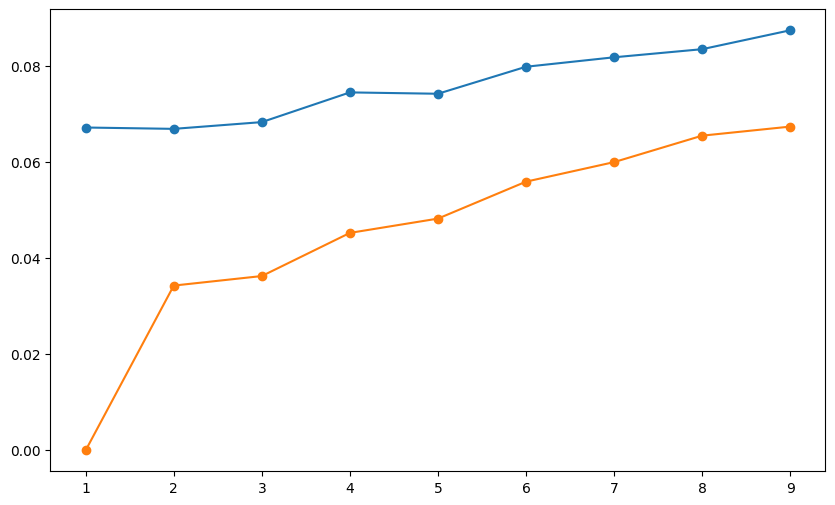

In [114]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_train,linestyle='solid', marker='o')
plt.plot(range(1,10),error_test,linestyle='solid', marker='o')

Лучший результат в 7% достигается при n=2.
Подводя итог, можно сделать вывод, что "предобработка" данных была выполнена успешно и задача классификации решена.

# Общие выводы

В данной работе мы познакомились с датасетом  master2.csv. Выяснили некоторые подробности о взаимосвязи количества населения, ВВП в год и иных показателей на количество самоубийств. Нашли и разрешили проблему с наличием пропущенных значений. Провели некоторую подготовку данных: векторизацию категориальных признаков и стандартизацию количественных. Для визуализации данных мы использовали библиотеку seaborn и построили диаграмму violinplot для всех параметров. В результате наша работа позволила успешно обучить модели для предсказания количеств самоубийств и получить хорошие метрики качества. Успешно обучили модели kNN, подобрали наиболее удачное количество соседей, немного поэкспериментировали. Также рассмотрели проблему несбалансированности данных.